In [71]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import cv2

In [103]:
mapk = np.random.randint(0, 1, (20, 20, 3))


In [104]:
def Euclid(vector1, vector2):
    result = 0
    for i in range(len(vector1)):
        result = result + (vector1[i] - vector2[i])*(vector1[i] - vector2[i])
    return math.sqrt(result)

In [105]:
def search_best_match(vector_, mapk):
    Euclid1 = Euclid(vector_, mapk[0][0])
    x = 0
    y = 0
    shp = mapk.shape
    for i in range(shp[0]):
        for j in range(shp[1]):
            Euclid2 = Euclid(vector_, mapk[i][j])
            if Euclid2 < Euclid1:
                Euclid1 = Euclid2
                x = i
                y = j
    return x, y


In [106]:
def train(train_vector, epoch, max_epoch ,mapk):
    best_match_unit = search_best_match(train_vector, mapk)
    L0 = 0.8
    shp = mapk.shape

    sigma0 = max(shp[0], shp[1])

    lambda_ = max_epoch/math.log(sigma0)

    sigma = sigma0 * math.exp(-epoch/lambda_)
    
    L = L0 * math.exp(-epoch/lambda_)
    for i in range(shp[0]):
        for j in range(shp[1]):
            d = Euclid(best_match_unit, (i,j))
            if d < sigma:
                Theta = math.exp(-d*d/(2*sigma*sigma))
                
                
                mapk[i][j] = mapk[i][j] + ((train_vector - mapk[i][j]).dot(Theta*L))

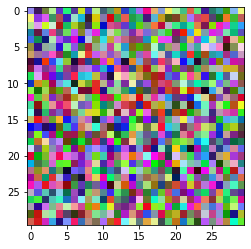

[[148 136 240]
 [ 63  24  94]
 [112 129  61]
 ...
 [181 137  61]
 [  8 253 201]
 [ 95 237  46]]


(900, 3)

In [108]:
learn_data = np.random.randint(0, 255, (30, 30, 3))
plt.imshow(learn_data)
plt.show()

learn_data = np.reshape(learn_data,(900,3))
print(learn_data)
learn_data.shape

In [109]:
epoch = 100
for i in range(epoch):
    clear_output(wait=True)
    print("Epoch: ", i)
    for j in range(learn_data.shape[0]):
        train(learn_data[j], i+1, epoch, mapk)
        

Epoch:  99


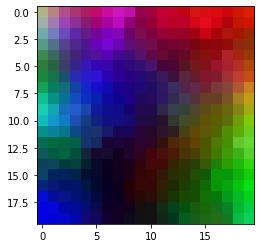

In [110]:
plt.imshow(mapk)
plt.show()